In [132]:
import pandas as pd
import numpy as np


In [133]:
df = pd.read_csv('intuit_craft_data_marketing.csv')
df.head()

,Tax Year,Login Date,Completed_Product,Marketing_Channel,CUSTOMER_TYPE,Login_Flag,Completed_bool,Completed,Session_Count,Price,customer_type,Login_month,Product + Price,Month
0,TY13,12/31/2013,(null),Paid Search,(null),1,False,Incomplete,(null),(null),Incomplete,12/1/2013,(null) ($(null)),12
1,TY13,12/31/2013,Premier,Organic Search,New,1,True,Completed Taxes,0,$59.99,New,12/1/2013,Premier ($59.99),12
2,TY13,1/2/2014,Deluxe,Organic Search,New,1,True,Completed Taxes,0,$39.99,New,1/1/2014,Deluxe ($39.99),1
3,TY13,1/2/2014,Free,Non-Campaign,New,1,True,Completed Taxes,0,$0.00,New,1/1/2014,Free ($0),1
4,TY13,1/4/2014,Premier,Non-Campaign,New,1,True,Completed Taxes,0,$59.99,New,1/1/2014,Premier ($59.99),1


In [134]:
df.dtypes

Tax Year             object
Login Date           object
Completed_Product    object
Marketing_Channel    object
CUSTOMER_TYPE        object
Login_Flag            int64
Completed_bool         bool
Completed            object
Session_Count        object
Price                object
customer_type        object
Login_month          object
Product + Price      object
Month                 int64
dtype: object

In [135]:
df.shape

(2000, 14)

In [136]:
df1 = df.drop(columns=['CUSTOMER_TYPE', 'Completed', 'Login_month', 'Product + Price'])


In [137]:
df1 = df1.rename(columns={"Completed_bool":"completed"})

In [138]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [139]:
df1.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Marketing_Channel',
       'Login_Flag', 'completed', 'Session_Count', 'Price', 'customer_type',
       'Month'],
      dtype='object')

In [140]:
from datetime import datetime 

df1['Login Date'] = df1['Login Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))


In [141]:
import datetime as dt

df1['Month'] = df1['Login Date'].dt.month
df1['Year'] = df1['Login Date'].dt.year
df1['DayOfMonth'] = df1['Login Date'].dt.day
df1['Weekday'] = df1['Login Date'].dt.weekday_name


df.groupby(['Month']).size()

Month
1     237
2     811
3     483
4     467
12      2
dtype: int64

In [142]:
df1.groupby('customer_type').mean()

,Login_Flag,completed,Month,Year,DayOfMonth
customer_type,,,,,
Incomplete,1.0,False,2.646341,2014.280488,14.853659
New,1.0,True,2.000000,2014.640000,13.576000
Veteran,1.0,True,2.638655,2014.533937,14.638009


In [143]:
df1['Price'] = df1['Price'].apply(lambda x: x.strip('$')).apply(lambda x: x.replace('(null)', ''))

In [144]:
df1['Price'] = df1['Price'].apply(pd.to_numeric)

In [145]:
df1 = df1.apply(lambda x: x.replace('(null)', ''))
df1.dtypes

Tax Year                     object
Login Date           datetime64[ns]
Completed_Product            object
Marketing_Channel            object
Login_Flag                    int64
completed                      bool
Session_Count                object
Price                       float64
customer_type                object
Month                         int64
Year                          int64
DayOfMonth                    int64
Weekday                      object
dtype: object

In [146]:
df1['Session_Count'] = df1['Session_Count'].apply(pd.to_numeric)

In [147]:
df1.dtypes

Tax Year                     object
Login Date           datetime64[ns]
Completed_Product            object
Marketing_Channel            object
Login_Flag                    int64
completed                      bool
Session_Count               float64
Price                       float64
customer_type                object
Month                         int64
Year                          int64
DayOfMonth                    int64
Weekday                      object
dtype: object

In [148]:
df1.groupby('completed').mean()

,Login_Flag,Session_Count,Price,Month,Year,DayOfMonth
completed,,,,,,
False,1.0,0.919847,NaN,2.646341,2014.280488,14.853659
True,1.0,2.424848,23.846477,2.590909,2014.541866,14.558612


In [149]:
df1.groupby('customer_type').mean()

,Login_Flag,completed,Session_Count,Price,Month,Year,DayOfMonth
customer_type,,,,,,,
Incomplete,1.0,False,0.919847,NaN,2.646341,2014.280488,14.853659
New,1.0,True,2.016129,13.916160,2.000000,2014.640000,13.576000
Veteran,1.0,True,2.458060,24.648862,2.638655,2014.533937,14.638009


In [150]:
df1.groupby('Marketing_Channel').mean()

,Login_Flag,completed,Session_Count,Price,Month,Year,DayOfMonth
Marketing_Channel,,,,,,,
Affiliate,1.0,0.787500,1.691176,13.330317,2.787500,2014.550000,14.875000
DR,1.0,0.839344,2.489583,28.196953,2.632787,2014.557377,14.072131
Display,1.0,0.838710,2.222222,23.072692,2.354839,2014.580645,16.290323
FI Channel,1.0,0.966667,2.700000,27.350230,2.666667,2014.588889,13.833333
Internal,1.0,0.500000,0.500000,0.000000,2.500000,2014.000000,10.500000
Non-Campaign,1.0,0.786087,2.102703,25.348695,2.556522,2014.466087,15.092174
Organic Search,1.0,0.846914,2.241645,23.143265,2.612346,2014.486420,14.474074
Other,1.0,0.625000,0.571429,19.998000,3.000000,2014.875000,14.625000
Paid Search,1.0,0.871032,2.187243,21.271025,2.587302,2014.478175,14.492063


In [151]:
df1.groupby('Completed_Product').mean()

,Login_Flag,completed,Session_Count,Price,Month,Year,DayOfMonth
Completed_Product,,,,,,,
,1.0,False,0.919847,NaN,2.646341,2014.280488,14.853659
Deluxe,1.0,True,2.265823,34.77125,2.517187,2014.568750,14.371875
Free,1.0,True,2.191381,0.00000,2.534247,2014.534247,14.711083
H & B,1.0,True,3.000000,99.99000,2.907216,2014.432990,14.577320
Premier,1.0,True,4.159091,59.99000,3.060606,2014.537879,14.522727


In [152]:
df1['Marketing_Channel']

0          Paid Search
1       Organic Search
2       Organic Search
3         Non-Campaign
4         Non-Campaign
5         Non-Campaign
6       Organic Search
7          Paid Search
8       Organic Search
9       Organic Search
10        Non-Campaign
11      Organic Search
12          FI Channel
13      Organic Search
14      Organic Search
15           Affiliate
16        Non-Campaign
17         Paid Search
18                  DR
19         Paid Search
20                  DR
21         Paid Search
22        Non-Campaign
23        Non-Campaign
24         Paid Search
25         Paid Search
26         Paid Search
27                  DR
28        Non-Campaign
29        Non-Campaign
             ...      
1970       Paid Search
1971       Paid Search
1972    Organic Search
1973      Non-Campaign
1974    Organic Search
1975      Non-Campaign
1976      Non-Campaign
1977      Non-Campaign
1978                DR
1979      Non-Campaign
1980      Non-Campaign
1981      Non-Campaign
1982    Org

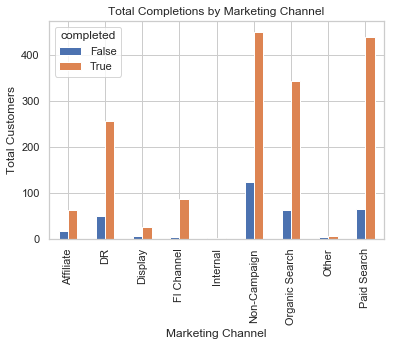

In [153]:
pd.crosstab(df['Marketing_Channel'],df1['completed']).plot(kind='bar')
plt.title('Total Completions by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Total Customers')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

Text(0, 0.5, 'Proportion of Customers')

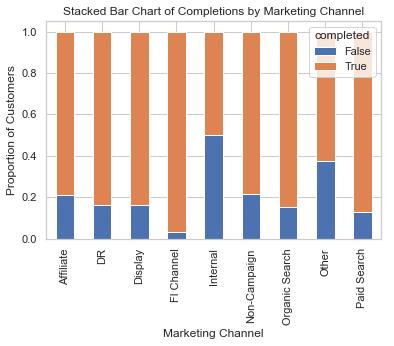

In [154]:
table=pd.crosstab(df['Marketing_Channel'],df1['completed'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Completions by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

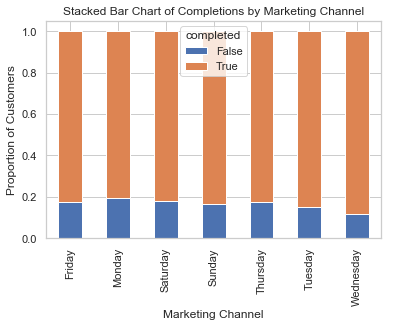

In [198]:
table=pd.crosstab(df1['Weekday'],df1['completed'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Completions by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Proportion of Customers')

In [210]:
pd.crosstab(df1['Weekday'],df1['completed'])

completed,False,True
Weekday,,
Friday,42,199
Monday,60,248
Saturday,45,203
Sunday,44,224
Thursday,47,223
Tuesday,51,287
Wednesday,39,288


In [208]:
df1.groupby(['Weekday'])['completed'].len

AttributeError: 'SeriesGroupBy' object has no attribute 'len'

Text(0, 0.5, 'Frequency')

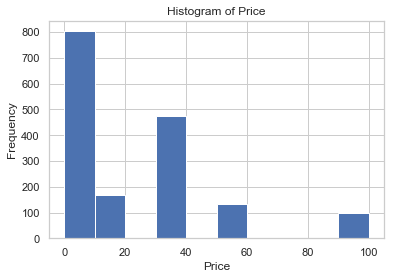

In [156]:
df1.Price.hist()
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [157]:
df1.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Marketing_Channel',
       'Login_Flag', 'completed', 'Session_Count', 'Price', 'customer_type',
       'Month', 'Year', 'DayOfMonth', 'Weekday'],
      dtype='object')

In [95]:
df_clean = df1

In [158]:
cat_vars=['Marketing_Channel', 'Month', 'Weekday']

for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    df_cat = df1.join(cat_list)
    df1 = df_cat
    
data_vars=df_cat.columns.values.tolist()


In [159]:
df_cat.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Marketing_Channel',
       'Login_Flag', 'completed', 'Session_Count', 'Price', 'customer_type',
       'Month', 'Year', 'DayOfMonth', 'Weekday', 'Marketing_Channel_Affiliate',
       'Marketing_Channel_DR', 'Marketing_Channel_Display',
       'Marketing_Channel_FI Channel', 'Marketing_Channel_Internal',
       'Marketing_Channel_Non-Campaign', 'Marketing_Channel_Organic Search',
       'Marketing_Channel_Other', 'Marketing_Channel_Paid Search', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_12', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [160]:
data_vars

['Tax Year',
 'Login Date',
 'Completed_Product',
 'Marketing_Channel',
 'Login_Flag',
 'completed',
 'Session_Count',
 'Price',
 'customer_type',
 'Month',
 'Year',
 'DayOfMonth',
 'Weekday',
 'Marketing_Channel_Affiliate',
 'Marketing_Channel_DR',
 'Marketing_Channel_Display',
 'Marketing_Channel_FI Channel',
 'Marketing_Channel_Internal',
 'Marketing_Channel_Non-Campaign',
 'Marketing_Channel_Organic Search',
 'Marketing_Channel_Other',
 'Marketing_Channel_Paid Search',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_12',
 'Weekday_Friday',
 'Weekday_Monday',
 'Weekday_Saturday',
 'Weekday_Sunday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday']

In [161]:
to_keep=[i for i in data_vars if i not in cat_vars]

In [162]:
data_final=df_cat[to_keep]
data_final.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Login_Flag',
       'completed', 'Session_Count', 'Price', 'customer_type', 'Year',
       'DayOfMonth', 'Marketing_Channel_Affiliate', 'Marketing_Channel_DR',
       'Marketing_Channel_Display', 'Marketing_Channel_FI Channel',
       'Marketing_Channel_Internal', 'Marketing_Channel_Non-Campaign',
       'Marketing_Channel_Organic Search', 'Marketing_Channel_Other',
       'Marketing_Channel_Paid Search', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_12', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [163]:
data_final = data_final.drop(columns=['Session_Count','Login Date', 'Login_Flag', 'Tax Year', 'Year'])

In [167]:
data_final = data_final.drop(columns=[
       'Completed_Product', 'customer_type', 'Price'
       ])

In [168]:
data_final.columns

Index(['completed', 'DayOfMonth', 'Marketing_Channel_Affiliate',
       'Marketing_Channel_DR', 'Marketing_Channel_Display',
       'Marketing_Channel_FI Channel', 'Marketing_Channel_Internal',
       'Marketing_Channel_Non-Campaign', 'Marketing_Channel_Organic Search',
       'Marketing_Channel_Other', 'Marketing_Channel_Paid Search', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_12', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [169]:
data_final = data_final.fillna(0)

In [170]:
data_final.shape

(2000, 23)

In [171]:
X = data_final.loc[:, data_final.columns != 'completed']
y = data_final.loc[:, data_final.columns == 'completed']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['completed'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no completion in oversampled data",len(os_data_y[os_data_y['completed']==0]))
print("Number of completion",len(os_data_y[os_data_y['completed']==1]))
print("Proportion of no completion data in oversampled data is ",len(os_data_y[os_data_y['completed']==0])/len(os_data_X))
print("Proportion of completion data in oversampled data is ",len(os_data_y[os_data_y['completed']==1])/len(os_data_X))

length of oversampled data is  2316
Number of no completion in oversampled data 1158
Number of completion 1158
Proportion of no completion data in oversampled data is  0.5
Proportion of completion data in oversampled data is  0.5


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
data_final_vars=data_final.columns.values.tolist()
y=['completed']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True]
[3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
data_final.columns

In [178]:
rfe_results = (zip([False,True,True,True,True,True,True,True,True,True,True,True
,True,True,False,True,True,True,True,True,True,True],['DayOfMonth', 'Marketing_Channel_Affiliate',
       'Marketing_Channel_DR', 'Marketing_Channel_Display',
       'Marketing_Channel_FI Channel', 'Marketing_Channel_Internal',
       'Marketing_Channel_Non-Campaign', 'Marketing_Channel_Organic Search',
       'Marketing_Channel_Other', 'Marketing_Channel_Paid Search', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_12', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday']))

In [179]:
variables_df = pd.DataFrame(data=rfe_results, columns=['bool','variable'])

In [180]:
variables_df

,bool,variable
0,False,DayOfMonth
1,True,Marketing_Channel_Affiliate
2,True,Marketing_Channel_DR
3,True,Marketing_Channel_Display
4,True,Marketing_Channel_FI Channel
5,True,Marketing_Channel_Internal
6,True,Marketing_Channel_Non-Campaign
7,True,Marketing_Channel_Organic Search
8,True,Marketing_Channel_Other
9,True,Marketing_Channel_Paid Search


In [181]:
list(variables_df.loc[variables_df['bool'] == True, 'variable'])

['Marketing_Channel_Affiliate',
 'Marketing_Channel_DR',
 'Marketing_Channel_Display',
 'Marketing_Channel_FI Channel',
 'Marketing_Channel_Internal',
 'Marketing_Channel_Non-Campaign',
 'Marketing_Channel_Organic Search',
 'Marketing_Channel_Other',
 'Marketing_Channel_Paid Search',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Weekday_Friday',
 'Weekday_Monday',
 'Weekday_Saturday',
 'Weekday_Sunday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday']

In [182]:
cols=['Marketing_Channel_Affiliate',
 'Marketing_Channel_DR',
 'Marketing_Channel_Display',
 'Marketing_Channel_FI Channel',
 'Marketing_Channel_Internal',
 'Marketing_Channel_Non-Campaign',
 'Marketing_Channel_Organic Search',
 'Marketing_Channel_Other',
 'Marketing_Channel_Paid Search',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Weekday_Friday',
 'Weekday_Monday',
 'Weekday_Saturday',
 'Weekday_Sunday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday']


In [183]:

X=os_data_X[cols]
y=os_data_y['completed']

In [184]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.615078
         Iterations: 35
                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.113     
Dependent Variable:          completed                 AIC:                       2889.0426 
Date:                        2019-07-25 07:58          BIC:                       3003.9946 
No. Observations:            2316                      Log-Likelihood:            -1424.5   
Df Model:                    19                        LL-Null:                   -1605.3   
Df Residuals:                2296                      LLR p-value:               4.0438e-65
Converged:                   0.0000                    Scale:                     1.0000    
No. Iterations:              35.0000                                                        
--------------------------------------------------------------------------------------------
                                  Coef.    

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [186]:
cols=['Marketing_Channel_Affiliate',
 'Marketing_Channel_DR',
 'Marketing_Channel_Display',
 'Marketing_Channel_FI Channel',
 'Marketing_Channel_Non-Campaign',
 'Marketing_Channel_Organic Search',
 'Marketing_Channel_Paid Search',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Weekday_Friday',
 'Weekday_Tuesday',
 'Weekday_Wednesday']
X=os_data_X[cols]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.616458
         Iterations 7
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.111     
Dependent Variable:      completed             AIC:                   2883.4349 
Date:                    2019-07-25 08:01      BIC:                   2963.9013 
No. Observations:        2316                  Log-Likelihood:        -1427.7   
Df Model:                13                    LL-Null:               -1605.3   
Df Residuals:            2302                  LLR p-value:           6.1773e-68
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          7.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------

In [187]:
cols=['Marketing_Channel_Affiliate',
 'Marketing_Channel_DR',
 'Marketing_Channel_Display',
 'Marketing_Channel_FI Channel',
 'Marketing_Channel_Non-Campaign',
 'Marketing_Channel_Organic Search',
 'Marketing_Channel_Paid Search',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Weekday_Tuesday',
 'Weekday_Wednesday']
X=os_data_X[cols]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.617086
         Iterations 7
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.110     
Dependent Variable:      completed             AIC:                   2884.3409 
Date:                    2019-07-25 08:01      BIC:                   2959.0597 
No. Observations:        2316                  Log-Likelihood:        -1429.2   
Df Model:                12                    LL-Null:               -1605.3   
Df Residuals:            2303                  LLR p-value:           4.5514e-68
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          7.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[247  95]
 [ 45 308]]


In [191]:
247+308

555

In [192]:
95+45

140

In [193]:
555/(555+140)

0.7985611510791367

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.72      0.78       342
        True       0.76      0.87      0.81       353

    accuracy                           0.80       695
   macro avg       0.81      0.80      0.80       695
weighted avg       0.80      0.80      0.80       695



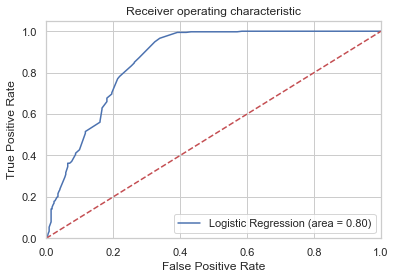

In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
df_clean.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Marketing_Channel',
       'Login_Flag', 'completed', 'Session_Count', 'Price', 'customer_type',
       'Month', 'Year', 'DayOfMonth', 'Weekday'],
      dtype='object')

In [31]:
df3 = df_clean

In [33]:
cat_vars1 =['Tax Year', 'Completed_Product', 'customer_type', 'Marketing_Channel', 'Month', 'Weekday']

for var in cat_vars1:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    df_corr = df3.join(cat_list)
    df3 = df_corr
# df2=df_corr.columns.values.tolist()

In [34]:
df3.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Marketing_Channel',
       'Login_Flag', 'completed', 'Session_Count', 'Price', 'customer_type',
       'Month', 'Year', 'DayOfMonth', 'Weekday', 'Tax Year_TY13',
       'Tax Year_TY14', 'Completed_Product_', 'Completed_Product_Deluxe',
       'Completed_Product_Free', 'Completed_Product_H & B',
       'Completed_Product_Premier', 'customer_type_Incomplete',
       'customer_type_New', 'customer_type_Veteran',
       'Marketing_Channel_Affiliate', 'Marketing_Channel_DR',
       'Marketing_Channel_Display', 'Marketing_Channel_FI Channel',
       'Marketing_Channel_Internal', 'Marketing_Channel_Non-Campaign',
       'Marketing_Channel_Organic Search', 'Marketing_Channel_Other',
       'Marketing_Channel_Paid Search', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_12', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dt

In [38]:
df3.columns

Index(['Tax Year', 'Login Date', 'Completed_Product', 'Marketing_Channel',
       'Login_Flag', 'completed', 'Session_Count', 'Price', 'customer_type',
       'Month', 'Year', 'DayOfMonth', 'Weekday', 'Tax Year_TY13',
       'Tax Year_TY14', 'Completed_Product_', 'Completed_Product_Deluxe',
       'Completed_Product_Free', 'Completed_Product_H & B',
       'Completed_Product_Premier', 'customer_type_Incomplete',
       'customer_type_New', 'customer_type_Veteran',
       'Marketing_Channel_Affiliate', 'Marketing_Channel_DR',
       'Marketing_Channel_Display', 'Marketing_Channel_FI Channel',
       'Marketing_Channel_Internal', 'Marketing_Channel_Non-Campaign',
       'Marketing_Channel_Organic Search', 'Marketing_Channel_Other',
       'Marketing_Channel_Paid Search', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_12', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dt

In [39]:
data_vars1=df3.columns.values.tolist()
to_keep=[i for i in data_vars1 if i not in cat_vars1]

In [45]:
df3 = df3[to_keep]
df3.columns

Index(['Login Date', 'Login_Flag', 'completed', 'Session_Count', 'Price',
       'Year', 'DayOfMonth', 'Tax Year_TY13', 'Tax Year_TY14',
       'Completed_Product_', 'Completed_Product_Deluxe',
       'Completed_Product_Free', 'Completed_Product_H & B',
       'Completed_Product_Premier', 'customer_type_Incomplete',
       'customer_type_New', 'customer_type_Veteran',
       'Marketing_Channel_Affiliate', 'Marketing_Channel_DR',
       'Marketing_Channel_Display', 'Marketing_Channel_FI Channel',
       'Marketing_Channel_Internal', 'Marketing_Channel_Non-Campaign',
       'Marketing_Channel_Organic Search', 'Marketing_Channel_Other',
       'Marketing_Channel_Paid Search', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_12', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [49]:
df3 = df3.drop(columns=['Login Date'])

In [50]:
corr_values = df3.values

In [ ]:
import numpy as np
import pandas as pd

marketing_channel = df['Marketing_Channel'].unique()
month = []
smoker = ['yes','no']

data = np.repeat(np.stack(np.meshgrid(time, sex, smoker), -1).reshape(-1,3), 10, axis=0)
df = pd.DataFrame(data, columns=["time","sex","smoker"])
df["total_bill"] = np.random.rand(len(df))*10